### Poisson Ratings
https://penaltyblog.readthedocs.io/en/latest/ratings/massey_ratings.html

https://www.pro-football-reference.com/years/2022/games.htm


In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import penaltyblog as pb

In [16]:
DATA_DIR = os.path.join(os.getcwd(), 'data/')
CHART_DIR = os.path.join(os.getcwd(), 'charts/')

In [17]:
#data_file = './data/FMF_TA_2021.csv'
data_file = './data/nfl2022-5.csv'
df = pd.read_csv(data_file, index_col=0)
df.head()

,Day,Date,Time,Winner,at,Loser,box,PtsW,PtsL,YdsW,TOW,YdsL,TOL
Week,,,,,,,,,,,,,
1,Thu,2022-09-08,8:20PM,Buffalo Bills,@,Los Angeles Rams,boxscore,31.0,10.0,413.0,4.0,243.0,3.0
1,Sun,2022-09-11,1:00PM,New Orleans Saints,@,Atlanta Falcons,boxscore,27.0,26.0,385.0,1.0,416.0,2.0
1,Sun,2022-09-11,1:00PM,Houston Texans,NaN,Indianapolis Colts,boxscore,20.0,20.0,299.0,1.0,517.0,2.0
1,Sun,2022-09-11,1:00PM,Chicago Bears,NaN,San Francisco 49ers,boxscore,19.0,10.0,204.0,1.0,331.0,2.0
1,Sun,2022-09-11,1:00PM,Baltimore Ravens,@,New York Jets,boxscore,24.0,9.0,274.0,1.0,380.0,2.0


In [18]:
df['HomeTeam'] = np.where(df['at'] == '@', df['Loser'], df['Winner'])
df['AwayTeam'] = np.where(df['at'] == '@', df['Winner'], df['Loser'])
df['FTHG'] = np.where(df['at'] == '@', df['PtsL'], df['PtsW'])
df['FTAG'] = np.where(df['at'] == '@', df['PtsW'], df['PtsL'])

In [19]:
pr = df.iloc[95:108]
df = df.iloc[0:94]
print(df)
print(pr)

      Day        Date    Time              Winner   at                 Loser  \
Week                                                                           
1     Thu  2022-09-08  8:20PM       Buffalo Bills    @      Los Angeles Rams   
1     Sun  2022-09-11  1:00PM  New Orleans Saints    @       Atlanta Falcons   
1     Sun  2022-09-11  1:00PM      Houston Texans  NaN    Indianapolis Colts   
1     Sun  2022-09-11  1:00PM       Chicago Bears  NaN   San Francisco 49ers   
1     Sun  2022-09-11  1:00PM    Baltimore Ravens    @         New York Jets   
...   ...         ...     ...                 ...  ...                   ...   
6     Sun  2022-10-16  4:05PM   Carolina Panthers    @      Los Angeles Rams   
6     Sun  2022-10-16  4:05PM   Arizona Cardinals    @      Seattle Seahawks   
6     Sun  2022-10-16  4:25PM       Buffalo Bills    @    Kansas City Chiefs   
6     Sun  2022-10-16  8:20PM      Dallas Cowboys    @   Philadelphia Eagles   
6     Mon  2022-10-17  8:15PM      Denve

In [20]:
#df.home_score = df['FTHG'].astype('int')
#df.away_score = df['FTAG'].astype('int')

In [21]:
for i in range(0,108-95):
    EL = pr.iloc[i]['HomeTeam']
    EV = pr.iloc[i]['AwayTeam']
    print(f'{EV} @ {EL}')

Atlanta Falcons @ Cincinnati Bengals
Cleveland Browns @ Baltimore Ravens
Indianapolis Colts @ Tennessee Titans
Detroit Lions @ Dallas Cowboys
Green Bay Packers @ Washington Commanders
New York Giants @ Jacksonville Jaguars
Tampa Bay Buccaneers @ Carolina Panthers
Houston Texans @ Las Vegas Raiders
New York Jets @ Denver Broncos
Kansas City Chiefs @ San Francisco 49ers
Seattle Seahawks @ Los Angeles Chargers
Pittsburgh Steelers @ Miami Dolphins
Chicago Bears @ New England Patriots


# df.dtypes

In [13]:
df[["FTHG", "FTAG"]].mean()

FTHG    22.4625
FTAG    21.2000
dtype: float64

Text(0.5, 1.0, 'Number of Goals Scored Per Match')

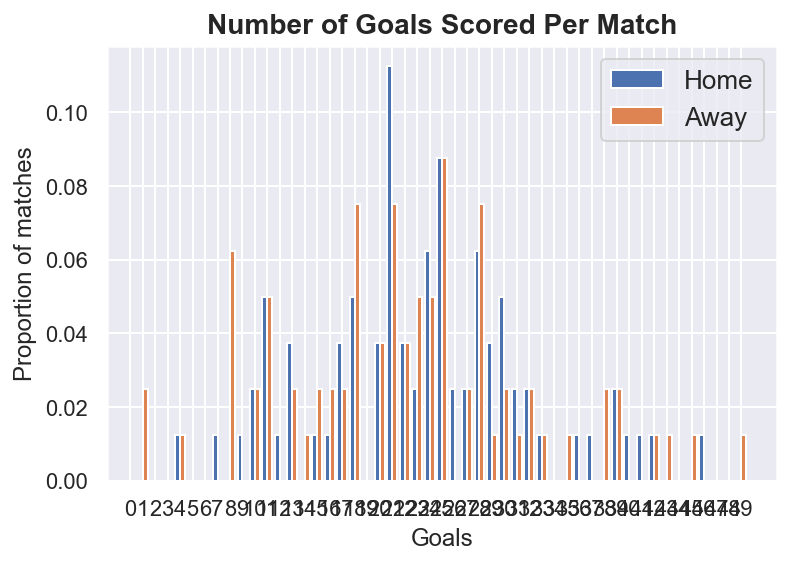

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

max_goals = 50
plt.hist(
    df[["FTHG", "FTAG"]].values, range(max_goals), 
                 label=["Home", "Away"], density=True
)
plt.xticks([i - 0.5 for i in range(max_goals)], 
            [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Goals Scored Per Match", size=14, 
          fontweight="bold")

Text(0.5, 1.0, 'Number of Goals Scored Per Match')

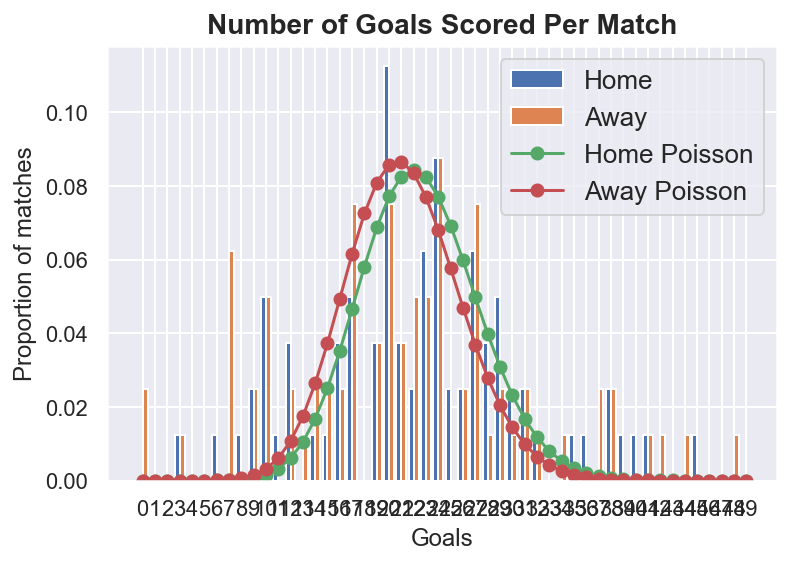

In [15]:
import numpy as np
from scipy.stats import poisson

home_poisson = poisson.pmf(range(50), df["FTHG"].mean())
away_poisson = poisson.pmf(range(50), df["FTAG"].mean())

max_goals = 50
plt.hist(
    df[["FTHG", "FTAG"]].values, range(max_goals), 
               label=["Home", "Away"], density=True
)

plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    home_poisson,
    linestyle="-",
    marker="o",
    label="Home Poisson",
)

plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    away_poisson,
    linestyle="-",
    marker="o",
    label="Away Poisson",
)


plt.xticks([i - 0.5 for i in range(1, max_goals + 1)], 
           [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Goals Scored Per Match", size=14, fontweight="bold")

In [16]:
def log_likelihood(
    goals_home_observed,
    goals_away_observed,
    home_attack,
    home_defence,
    away_attack,
    away_defence,
    home_advantage,
):
    goal_expectation_home = np.exp(home_attack + 
                                   away_defence + home_advantage)
    goal_expectation_away = np.exp(away_attack + home_defence)

    if goal_expectation_home < 0 or goal_expectation_away < 0:
        return 10000    

    home_llk = poisson.pmf(goals_home_observed, goal_expectation_home)
    away_llk = poisson.pmf(goals_away_observed, goal_expectation_away)

    log_llk = np.log(home_llk) + np.log(away_llk)

    return -log_llk

In [17]:
from scipy.optimize import minimize


def fit_poisson_model():
    teams = np.sort(np.unique(np.concatenate([df["HomeTeam"], 
                                              df["AwayTeam"]])))
    n_teams = len(teams)

    params = np.concatenate(
        (
            np.random.uniform(0.5, 1.5, (n_teams)),  # attack strength
            np.random.uniform(0, -1, (n_teams)),  # defence strength
            [0.25],  # home advantage
        )
    )

    def _fit(params, df, teams):
        attack_params = dict(zip(teams, params[:n_teams]))
        defence_params = dict(zip(teams, params[n_teams : 
                                                (2 * n_teams)]))
        home_advantage = params[-1]

        llk = list()
        for idx, row in df.iterrows():
            tmp = log_likelihood(
                row["FTHG"],
                row["FTAG"],
                attack_params[row["HomeTeam"]],
                defence_params[row["HomeTeam"]],
                attack_params[row["AwayTeam"]],
                defence_params[row["AwayTeam"]],
                home_advantage,
            )
            llk.append(tmp)

        return np.sum(llk)

    options = {
        "maxiter": 100,
        "disp": False,
    }

    constraints = [{"type": "eq", "fun": lambda x: 
                    sum(x[:n_teams]) - n_teams}]

    res = minimize(
        _fit,
        params,
        args=(df, teams),
        constraints=constraints,
        options=options,
    )

    model_params = dict(
        zip(
            ["attack_" + team for team in teams]
            + ["defence_" + team for team in teams]
            + ["home_adv"],
            res["x"],
        )
    )

    return model_params

model_params = fit_poisson_model()

In [18]:
from pprint import pprint

pprint(model_params)

{'attack_Arizona Cardinals': 0.853003515825849,
 'attack_Atlanta Falcons': 0.9445129238783199,
 'attack_Baltimore Ravens': 1.556791861531529,
 'attack_Buffalo Bills': 1.321382559988903,
 'attack_Carolina Panthers': 0.7878617656023017,
 'attack_Chicago Bears': 0.8757541527366495,
 'attack_Cincinnati Bengals': 1.1045561469083967,
 'attack_Cleveland Browns': 1.1324243064460404,
 'attack_Dallas Cowboys': 0.9524099317186868,
 'attack_Denver Broncos': 0.5924446944209182,
 'attack_Detroit Lions': 1.2395920097486872,
 'attack_Green Bay Packers': 1.0303393263900675,
 'attack_Houston Texans': 0.8520212192624161,
 'attack_Indianapolis Colts': 0.5309712171529125,
 'attack_Jacksonville Jaguars': 1.0463926049746062,
 'attack_Kansas City Chiefs': 1.4087745424622236,
 'attack_Las Vegas Raiders': 1.0844476973438486,
 'attack_Los Angeles Chargers': 1.0299615656018495,
 'attack_Los Angeles Rams': 0.908762063295057,
 'attack_Miami Dolphins': 1.4103063923403383,
 'attack_Minnesota Vikings': 0.8856681665249

In [19]:
def predict(home_team, away_team, params, max_goals=50):
    home_attack = params["attack_" + home_team]
    home_defence = params["defence_" + home_team]
    away_attack = params["attack_" + away_team]
    away_defence = params["defence_" + away_team]
    home_advantage = params["home_adv"]

    home_goal_expectation = np.exp(home_attack + away_defence 
                                   + home_advantage)
    away_goal_expectation = np.exp(away_attack + home_defence)

    home_probs = poisson.pmf(list(range(max_goals + 1)), 
                             home_goal_expectation)
    away_probs = poisson.pmf(range(max_goals + 1), 
                             away_goal_expectation)

    probability_matrix = np.outer(home_probs, away_probs)

    return probability_matrix

In [20]:
for i in range(0,14):
    EL = pr.iloc[i]['HomeTeam']
    EV = pr.iloc[i]['AwayTeam']
    
    probs = predict(EL, EV, model_params, 4)
    #pprint(probs)
    L = np.sum(np.tril(probs, -1))
    V = np.sum(np.triu(probs, 1))
    if L > V :
        print(f'Gana Local {EL}')
    else:
        print(f'Gana Visita {EV}')

Gana Local Chicago Bears
Gana Visita Cincinnati Bengals
Gana Visita Jacksonville Jaguars
Gana Local Miami Dolphins
Gana Visita New England Patriots
Gana Visita New York Jets
Gana Visita Baltimore Ravens
Gana Visita San Francisco 49ers
Gana Visita Tampa Bay Buccaneers
Gana Local Los Angeles Rams
Gana Visita Arizona Cardinals
Gana Visita Buffalo Bills
Gana Local Philadelphia Eagles
Gana Local Los Angeles Chargers


# Históricos

In [25]:
data_file = './data/spreadspoke_scores.csv'
dfh = pd.read_csv(data_file, index_col=0)
dfh.head()

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
schedule_date,,,,,,,,,,,,,,,,
9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [44]:
def prob(l,v,d):
    if (l+v)>0 :
        return d/(l+v)
    else:
        return 0

In [45]:
prob(3,5,2)

0.25

In [48]:
for i in range(0,14):
    E2 = pr.iloc[i]['HomeTeam']
    E1 = pr.iloc[i]['AwayTeam']
    print (f'---------------------------------------')
    print(f'{i} {E1} @ {E2}')
    print (f'---------------------------------------')
    df2 = dfh.loc[(dfh['team_home'] == E1) & (dfh['team_away'] == E2)]
    #df2
    df2['ganador'] = np.where(df2['score_home']>df2['score_away'], 'L','V')
    df2['diferencial'] = df2['score_home'] - df2['score_away']
    #df2
    l = sum(df2.ganador == 'L')
    v = sum(df2.ganador == 'V')
    print (f'{E2} - local: {l} \n{E1} - visita: {v}')
    gamesundersix = sum(abs(df2.diferencial) <=6)
    print(f'juegos con diferencia {gamesundersix}')
    print(f'probabilidad de juego under six {prob(l,v,gamesundersix)*100}')
    print (f'---------------------------------------')
    df3 = dfh.loc[(dfh['team_away'] == E1) & (dfh['team_home'] == E2)]
    #df3
    df3['ganador'] = np.where(df3['score_home']>df3['score_away'], 'L','V')
    df3['diferencial'] = df3['score_home'] - df3['score_away']
    #df3
    l = sum(df3.ganador == 'L')
    v = sum(df3.ganador == 'V')
    print (f'{E1} - local: {l} \n{E2} - visita: {v}')
    gamesundersix = sum(abs(df3.diferencial) <=6)
    print(f'juegos con diferencia {gamesundersix}')
    print(f'probabilidad de juego under six {prob(l,v,gamesundersix)*100}')



---------------------------------------
0 Washington Commanders @ Chicago Bears
---------------------------------------
Chicago Bears - local: 0 
Washington Commanders - visita: 0
juegos con diferencia 0
probabilidad de juego under six 0
---------------------------------------
Washington Commanders - local: 0 
Chicago Bears - visita: 1
juegos con diferencia 0
probabilidad de juego under six 0.0
---------------------------------------
1 Cincinnati Bengals @ New Orleans Saints
---------------------------------------
New Orleans Saints - local: 3 
Cincinnati Bengals - visita: 5
juegos con diferencia 2
probabilidad de juego under six 25.0
---------------------------------------
Cincinnati Bengals - local: 2 
New Orleans Saints - visita: 5
juegos con diferencia 1
probabilidad de juego under six 14.285714285714285
---------------------------------------
2 Jacksonville Jaguars @ Indianapolis Colts
---------------------------------------
Indianapolis Colts - local: 12 
Jacksonville Jaguars - v

In [51]:
E1 = 'San Diego Chargers'
E2 = 'Denver Broncos'
print (f'---------------------------------------')
print(f'{E1} @ {E2}')
print (f'---------------------------------------')
df2 = dfh.loc[(dfh['team_home'] == E1) & (dfh['team_away'] == E2)]
#df2
df2['ganador'] = np.where(df2['score_home']>df2['score_away'], 'L','V')
df2['diferencial'] = df2['score_home'] - df2['score_away']
#df2
l = sum(df2.ganador == 'L')
v = sum(df2.ganador == 'V')
print (f'{E1} - local: {l} \n{E2} - visita: {v}')
gamesundersix = sum(abs(df2.diferencial) <=6)
print(f'juegos con diferencia {gamesundersix}')
print(f'probabilidad de juego under six {prob(l,v,gamesundersix)*100}')
print (f'---------------------------------------')
df3 = dfh.loc[(dfh['team_away'] == E1) & (dfh['team_home'] == E2)]
#df3
df3['ganador'] = np.where(df3['score_home']>df3['score_away'], 'L','V')
df3['diferencial'] = df3['score_home'] - df3['score_away']
#df3
l = sum(df3.ganador == 'L')
v = sum(df3.ganador == 'V')
print (f'{E2} - local: {l} \n{E1} - visita: {v}')

---------------------------------------
San Diego Chargers @ Denver Broncos
---------------------------------------
San Diego Chargers - local: 28 
Denver Broncos - visita: 23
juegos con diferencia 13
probabilidad de juego under six 25.49019607843137
---------------------------------------
Denver Broncos - local: 38 
San Diego Chargers - visita: 14


In [ ]:
EL = 'Seattle Seahawks'
EV = 'Atlanta Falcons'

In [ ]:
probs = predict(EL, EV, model_params, 4)
pprint(probs)

In [ ]:
# draw
E = np.sum(np.diag(probs))
print(f'Probabilidad que empaten {EL} vs {EV} es = {E}')

In [ ]:
# home win
L = np.sum(np.tril(probs, -1))
print(f'Probabilidad que gane {EL} vs {EV} es = {L}')

In [ ]:
# away win
V = np.sum(np.triu(probs, 1))
print(f'Probabilidad que pierda {EL} vs {EV} es = {V}')

In [ ]:
print(f'{EL} vs {EV} L {100/L} E {100/E} V {100/V}')

In [ ]:
if L > V :
    print(f'Gana {EL}')
else:
    print(f'Gana {EV}')

In [24]:
pr

,Day,Date,Time,Winner,at,Loser,box,PtsW,PtsL,YdsW,TOW,YdsL,TOL,HomeTeam,AwayTeam,FTHG,FTAG
Week,,,,,,,,,,,,,,,,,


In [32]:
for i in range(1,15):
    EL = pr.iloc[i]['HomeTeam']
    EV = pr.iloc[i]['AwayTeam']
    print(f'{EV} @ {EL}')


Chicago Bears @ New York Giants
New York Jets @ Pittsburgh Steelers
Cleveland Browns @ Atlanta Falcons
Washington Commanders @ Dallas Cowboys
Buffalo Bills @ Baltimore Ravens
Jacksonville Jaguars @ Philadelphia Eagles
Tennessee Titans @ Indianapolis Colts
Los Angeles Chargers @ Houston Texans
Seattle Seahawks @ Detroit Lions
Arizona Cardinals @ Carolina Panthers
Denver Broncos @ Las Vegas Raiders
New England Patriots @ Green Bay Packers
Kansas City Chiefs @ Tampa Bay Buccaneers
Los Angeles Rams @ San Francisco 49ers
